# Assignment 5

## Question 3

In [1]:
import pandas as pd
import statistics as st
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

### 3.1

In [2]:
diabetes = pd.read_excel("Diabetes_Data.xlsx", sheet_name = "Diabetes_Data")
diabetes.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
diabetes.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


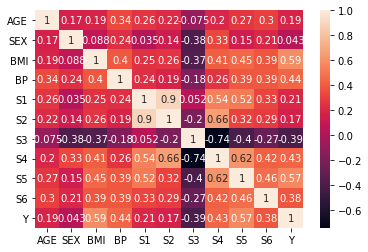

In [4]:
sns.heatmap(diabetes.corr(), annot = True);

### 3.3

In [5]:
y = diabetes[["Y"]]
X = diabetes[["AGE", "SEX", "BMI", "BP", "S1", "S2", "S3", "S4", "S5", "S6"]]

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           3.83e-62
Time:                        03:13:12   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -334.5671     67.455     -4.960      0.000    -467.148    -201.986
AGE           -0.0364      0.217     -0.168      0.867      -0.463       0.390
SEX          -22.8596      5.836     -3.917      0.000     -34.330     -11.389
BMI            5.6030      0.717      7.813      0.000       4.194       7.012
BP             1.1168      0.225      4.958      0.000       0.674       1.560
S1            -1.0900      0.573     -1.901      0.058      -2.217       0.037
S2             0.7465      0.531      1.406      0.160      -0.297       1.790
S3             0.3720      0.782      0.475      0.635      -1.166       1.910
S4             6.5338      5.959      1.097      0.273      -5.178      18.245
S5            68.4831     15.670      4.370      0.000      37.685      99.282
S6             0.2801      0.273      1.025      0.306      -0.257       0.817
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                     7.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
print("Adj R-squared: " + str(model.rsquared_adj))
y = diabetes.Y.astype(float)
y_predict = (-334.56716 + (diabetes["BMI"]*5.6030) + (diabetes["S5"]*68.4831) + (diabetes["BP"]*1.1168)
             + (diabetes["S1"]*-1.0900) + (diabetes["SEX"]*-22.8596) + (diabetes["S2"]*0.7465) + (diabetes["AGE"]*-0.0364)
            + (diabetes["S4"]*6.5338) + (diabetes["S3"]*0.3720) + (diabetes["S6"]*0.2801))

MSE = []

for i in range(len(y_predict)-1):
    x = list(y_predict)[i] - list(y)[i]
    MSE.append(x**2)
MSE = sum(MSE)/len(y)

print("MSE: " + str(MSE))

Adj R-squared: 0.5065592904853231
MSE: 2859.6678315101817


### 3.5

In [7]:
import pandas as pd
import statsmodels.api as sm


def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+
                                                             [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
            print( "p_value: " + str(model.pvalues[-1]) + ";  BIC: " + 
                  str(model.bic)  + ";  columns: " 
                  + str(included)  + str(new_column) + "\n")
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return ("Selected Features: " + str(included))

In [8]:
forward_regression(X, y, 0.05)

p_value: 1.649372052742768e-22;  BIC: 5010.690223272501;  columns: []BP

p_value: 6.920711787760167e-06;  BIC: 5086.184324244617;  columns: []S1

p_value: 2.3042532817539244e-21;  BIC: 5015.938418181951;  columns: []S4

p_value: 7.580083266085417e-17;  BIC: 5036.604002309223;  columns: []S6

p_value: 7.055686149116377e-05;  BIC: 5090.628595900633;  columns: []AGE

p_value: 0.3664292946519865;  BIC: 5105.69386189398;  columns: []SEX

p_value: 0.00023598480959854726;  BIC: 5092.916985322346;  columns: []S2

p_value: 8.82645895888066e-39;  BIC: 4935.906378346716;  columns: []S5

p_value: 6.1628646951849165e-18;  BIC: 5031.623877850695;  columns: []S3

p_value: 3.4660064451673995e-42;  BIC: 4920.220840431717;  columns: []BMI

p_value: 1.725600740708269e-09;  BIC: 4889.761772168868;  columns: ['BMI']BP

p_value: 0.07961267496974946;  BIC: 4923.214836999257;  columns: ['BMI']S1

p_value: 5.8882798582099035e-08;  BIC: 4896.67786578721;  columns: ['BMI']S4

p_value: 1.165706114161384e-05;  BIC

<ipython-input-7-ca0cc666da4e>:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


p_value: 0.02539962267559936;  BIC: 4826.439760516057;  columns: ['BMI', 'S5', 'BP', 'S1']S4

p_value: 0.32991988592813815;  BIC: 4830.547378793463;  columns: ['BMI', 'S5', 'BP', 'S1']S6

p_value: 0.6943614796890458;  BIC: 4831.354048841555;  columns: ['BMI', 'S5', 'BP', 'S1']AGE

p_value: 0.009230559696371318;  BIC: 4824.631948820778;  columns: ['BMI', 'S5', 'BP', 'S1']SEX

p_value: 0.014678455493184913;  BIC: 4825.467236635237;  columns: ['BMI', 'S5', 'BP', 'S1']S2

p_value: 0.029767168365389892;  BIC: 4826.717589389171;  columns: ['BMI', 'S5', 'BP', 'S1']S3

p_value: 0.0005434864432700575;  BIC: 4818.556637549459;  columns: ['BMI', 'S5', 'BP', 'S1', 'SEX']S4

p_value: 0.18510166690241814;  BIC: 4828.936766477945;  columns: ['BMI', 'S5', 'BP', 'S1', 'SEX']S6

p_value: 0.8983645197576067;  BIC: 4830.706662759639;  columns: ['BMI', 'S5', 'BP', 'S1', 'SEX']AGE

p_value: 0.0002723023992734576;  BIC: 4817.24265379577;  columns: ['BMI', 'S5', 'BP', 'S1', 'SEX']S2

p_value: 0.00060542283597

"Selected Features: ['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']"

In [9]:
features = ['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']
X = diabetes[features]
y = diabetes.Y.astype(float)

model = sm.OLS(y, sm.add_constant(X)).fit()
print("R-squared: " + str(model.rsquared))

y_predict = (-313.7666 + (diabetes["BMI"]*5.7111) + (diabetes["S5"]*73.3065) + (diabetes["BP"]*1.1266)
             + (diabetes["S1"]*-1.0429) + (diabetes["SEX"]*-21.5910) + (diabetes["S2"]*0.8433))

MSE = []

for i in range(len(y_predict)-1):
    x = list(y_predict)[i] - list(y)[i]
    MSE.append(x**2)
MSE = sum(MSE)/len(y)

print("MSE: " + str(MSE))
model.summary()

R-squared: 0.5148837959256445
MSE: 2876.358649901557


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     76.95
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           3.01e-65
Time:                        03:13:12   Log-Likelihood:                -2387.3
No. Observations:                 442   AIC:                             4789.
Df Residuals:                     435   BIC:                             4817.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -313.7666     25.385    -12.360      0.000    -363.659    -263.875
BMI            5.7111      0.707      8.075      0.000       4.321       7.101
S5            73.3065      7.308     10.031      0.000      58.943      87.670
BP             1.1266      0.216      5.219      0.000       0.702       1.551
S1            -1.0429      0.221     -4.724      0.000      -1.477      -0.609
SEX          -21.5910      5.706     -3.784      0.000     -32.805     -10.377
S2             0.8433      0.230      3.670      0.000       0.392       1.295
==============================================================================
Omnibus:                        1.187   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.552   Jarque-Bera (JB):                1.172
Skew:                           0.016   Prob(JB):                        0.557
Kurtosis:                       2.750   Cond. No.                     2.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Question 4

### 4.2

In [10]:
titanic = pd.read_csv("titanic3.csv")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [11]:
st.mean(titanic.survived)

0.3819709702062643

### 4.3

In [12]:
titanic[["pclass", "survived"]].groupby("pclass").mean()

,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


In [13]:
titanic[["sex", "survived"]].groupby("sex").mean()

,survived
sex,
female,0.727468
male,0.190985


In [14]:
titanic.loc[(titanic.age >= 80), "AgeGroup"] = "80-above"
titanic.loc[(titanic.age < 80), "AgeGroup"] = "70-79"
titanic.loc[(titanic.age < 70), "AgeGroup"] = "60-69"
titanic.loc[(titanic.age < 60), "AgeGroup"] = "50-59"
titanic.loc[(titanic.age < 50), "AgeGroup"] = "40-49"
titanic.loc[(titanic.age < 40), "AgeGroup"] = "30-39"
titanic.loc[(titanic.age < 30), "AgeGroup"] = "20-29"
titanic.loc[(titanic.age < 20), "AgeGroup"] = "10-19"
titanic.loc[(titanic.age < 10), "AgeGroup"] = "0-9"
titanic.loc[(titanic.sex == "female"), "Sex"] = 0
titanic.loc[(titanic.sex == "male"), "Sex"] = 1

In [15]:
titanic[["AgeGroup", "survived"]].groupby("AgeGroup").mean()

,survived
AgeGroup,
0-9,0.609756
10-19,0.391608
20-29,0.369186
30-39,0.422414
40-49,0.385185
50-59,0.457143
60-69,0.312500
70-79,0.142857
80-above,1.000000


### 4.4

C:\Users\Courage Ekoh\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Courage Ekoh\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


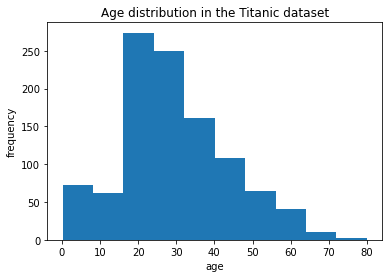

In [16]:
plt.hist(titanic.age);
plt.xlabel("age");
plt.ylabel("frequency");
plt.title("Age distribution in the Titanic dataset");

In [17]:
titanic = titanic[["pclass", "Sex", "age", "survived"]].dropna()

#Since the ages are not normally distributed, I dropped the NaN values

In [18]:
feature_cols = ["pclass", "Sex", "age"]
X = titanic[feature_cols]
y = titanic.survived

In [19]:
LR = LogisticRegression()
LR.fit(X, y)

LogisticRegression()

In [20]:
y_predict = LR.predict(X)

In [21]:
LR.coef_

array([[-1.11013316, -2.42696233, -0.03334323]])

In [22]:
LR.intercept_

array([4.48188405])

In [23]:
logit_model = sm.Logit(y, sm.add_constant(X)).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.469897
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1046
Model:                          Logit   Df Residuals:                     1042
Method:                           MLE   Df Model:                            3
Date:                Tue, 10 Nov 2020   Pseudo R-squ.:                  0.3051
Time:                        03:13:13   Log-Likelihood:                -491.51
converged:                       True   LL-Null:                       -707.31
Covariance Type:            nonrobust   LLR p-value:                 3.167e-93
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5893      0.406     11.311      0.000       3.794       5.385
pclass        -1.1332      0.112    -10.142      0.000      -1.352      -0.914
Sex           -2.4974      0.166    -15.033      0.000      -2.823      -2.172
age           -0.0339      0.006     -5.395      0.000      -0.046      -0.022
==============================================================================
"""

### 4.5

In [25]:
confusion_matrix = metrics.confusion_matrix(y , y_predict)
confusion_matrix

array([[524,  95],
       [127, 300]], dtype=int64)

In [26]:
print("Accuracy:",metrics.accuracy_score(y, y_predict))
print("Precision:",metrics.precision_score(y, y_predict))
print("Recall:",metrics.recall_score(y, y_predict))

Accuracy: 0.7877629063097514
Precision: 0.759493670886076
Recall: 0.702576112412178
